In [1]:
# 导入TensorFlow模块
import tensorflow as tf
import time

F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\ten

In [3]:
# 建立TensorFlow计算图
size= 500
W = tf.random_normal([size, size], name='W')
X = tf.random_normal([size, size], name='X')
mul = tf.matmul(W, X, name='mul')
sum_result = tf.reduce_sum(mul, name='sum')

with tf.Session(config=tfconfig) as sess:
    result = sess.run(sum_result)
    
print('result = ', result)

result =  13348.319


In [5]:
# 显示详细的GPU信息
"""使用tf.ConfigProto建立session的配置设置tfconfig，传入参数log_device_placement=True，代表要显示设备相关的信息
并在session打开的时候传入配置信息
"""
tfconfig = tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
    result = sess.run(sum_result)
    
print('result = ', result)

result =  -7232.993


### 还可以使用 with tf.device来指定使用CPU或者GPU

In [10]:
"""1. 指定用CPU计算的程序代码"""
size= 500
with tf.device('/gpu:0'):
    W = tf.random_normal([size, size], name='W')
    X = tf.random_normal([size, size], name='X')
    mul = tf.matmul(W, X, name='mul')
    sum_result = tf.reduce_sum(mul, name='sum')

with tf.Session(config=tfconfig) as sess:
    result = sess.run(sum_result)
    
print('result = ', result)

result =  -4508.9854


## 测试GPU和CPU的性能

In [5]:
def test_performance(device_name, size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name='W')
        X = tf.random_normal([size, size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')
    startTime = time.time()
    tfConfig = tf.ConfigProto(log_device_placement=True)
    with tf.Session() as sess:
        result = sess.run(sum_result)
    takeTime = time.time()-startTime
    print(device_name, ', size = ', size, ', Time = ', takeTime)
    return takeTime

In [12]:
g = test_performance('/gpu:0', 100)
c = test_performance('/cpu:0', 100)

/gpu:0 , size =  100 , Time =  0.3510580062866211
/cpu:0 , size =  100 , Time =  0.04687070846557617


In [15]:
for i in range(0, 5001, 500):
    print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000


In [16]:
# 重复执行程序代码
gpu_set = []
cpu_set = []
i_set = []
for i in range(0, 5001, 500):
    g = test_performance('/gpu:0', i)
    c = test_performance('/cpu:0', i)
    gpu_set.append(g)
    cpu_set.append(c)
    i_set.append(i)

/gpu:0 , size =  0 , Time =  0.36986231803894043
/cpu:0 , size =  0 , Time =  0.031249284744262695
/gpu:0 , size =  500 , Time =  0.04686927795410156
/cpu:0 , size =  500 , Time =  0.04687070846557617
/gpu:0 , size =  1000 , Time =  0.050843238830566406
/cpu:0 , size =  1000 , Time =  0.08985710144042969
/gpu:0 , size =  1500 , Time =  0.04687023162841797
/cpu:0 , size =  1500 , Time =  0.19997549057006836
/gpu:0 , size =  2000 , Time =  0.07630276679992676
/cpu:0 , size =  2000 , Time =  0.37427663803100586
/gpu:0 , size =  2500 , Time =  0.09374141693115234
/cpu:0 , size =  2500 , Time =  0.6507406234741211
/gpu:0 , size =  3000 , Time =  0.14061355590820312
/cpu:0 , size =  3000 , Time =  1.0097084045410156
/gpu:0 , size =  3500 , Time =  0.18689322471618652
/cpu:0 , size =  3500 , Time =  1.747990608215332
/gpu:0 , size =  4000 , Time =  0.2572340965270996
/cpu:0 , size =  4000 , Time =  2.186642646789551
/gpu:0 , size =  4500 , Time =  0.32494115829467773
/cpu:0 , size =  4500 , T

### 产生的矩阵越大，GPU的计算优势越明显，用时越短

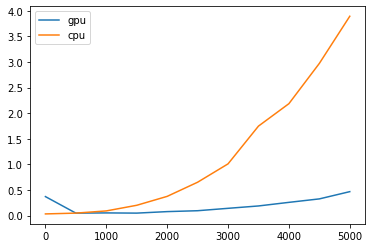

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.plot(i_set, gpu_set, label='gpu')
plt.plot(i_set, cpu_set, label='cpu')
plt.legend()
plt.show()

### 从上方图片看出，矩阵越大，CPU和GPU的差距越大。矩阵越大，GPU越能发挥性能

In [ ]:
# 测试超出显卡内存限制
g = test_performance('/gpu:0', 9000)
# c = test_performance('/cpu:0', 6000)

## 经过测试，当矩阵为9000， 会发生显卡内存溢出错误

![](./lesson20/1.jpg)